In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

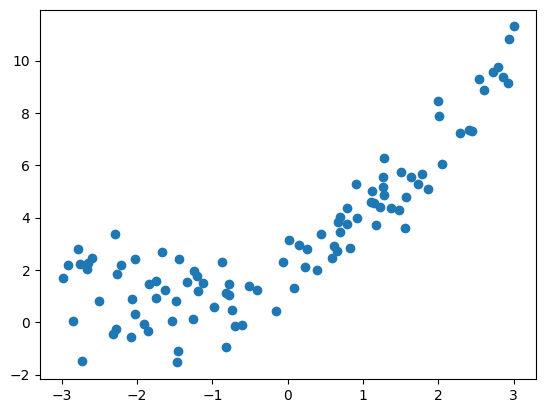

In [5]:
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X ** 2 + 1.5*X + 2 + np.random.randn(100,1)
plt.scatter(X,y)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
reg_1 = LinearRegression()

In [8]:
reg_1.fit(X_train,y_train)

LinearRegression()

In [9]:
from sklearn.metrics import r2_score

In [10]:
score = r2_score(y_test, reg_1.predict(X_test))
print(score)

0.8128415699455461


Text(0, 0.5, 'Y')

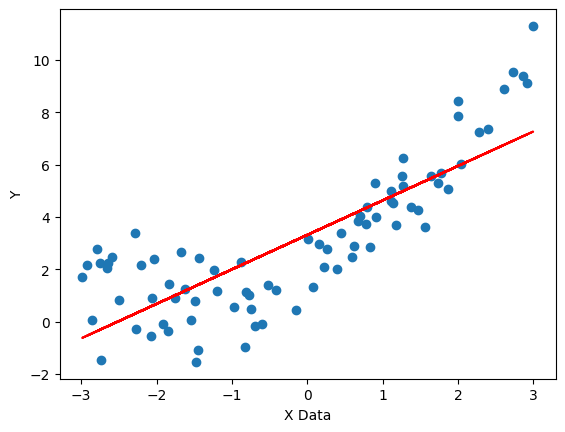

In [11]:
plt.plot(X_train, reg_1.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("X Data")
plt.ylabel("Y")

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [15]:
reg = LinearRegression()
reg.fit(X_train_poly,y_train)
y_pred = reg.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.9564773644402097


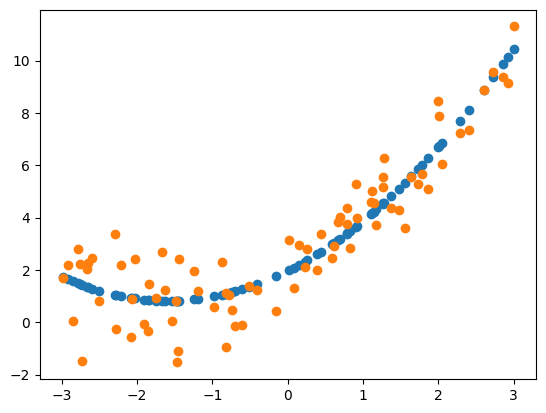

In [16]:
plt.scatter(X_train,reg.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [17]:
# Pipeline concepts
from sklearn.pipeline import Pipeline

In [34]:
def poly_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("Poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train, y_train)
    y_pred_new = poly_regression.predict(X_new)
    plt.plot(X_new, y_pred_new,"r",label="Degree " + str(degree),linewidth = 2,)
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, y_test, color="g", linewidth = 3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4,0,10])

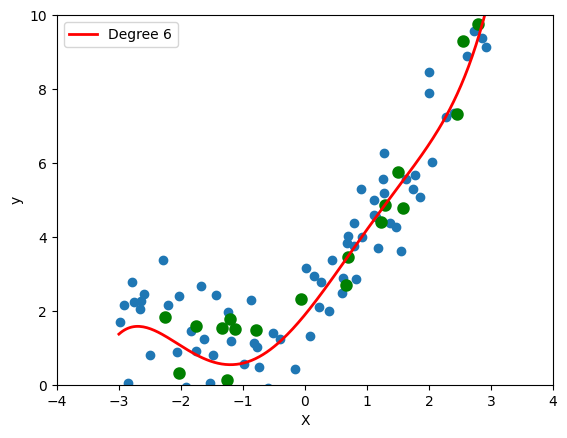

In [38]:
poly_regression(6)